**Problem Statement**

The California Housing Price dataset is a well-known dataset that contains information about the median housing prices for various districts in California, as well as other attributes such as the population, median income, and the latitude/longitude of the district.

The goal of the problem is to predict the median housing price in any district given the other attributes. This is a supervised regression problem, where the target variable is the median housing price, and the input variables are the other attributes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.size

206400

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
labels_dict = {}
unique_values = df['ocean_proximity'].unique()
for i, val in enumerate(unique_values):
    labels_dict[val] = i
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda x: labels_dict[x])


In [9]:
print(labels_dict)

{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}


In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [11]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.464729
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [15]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

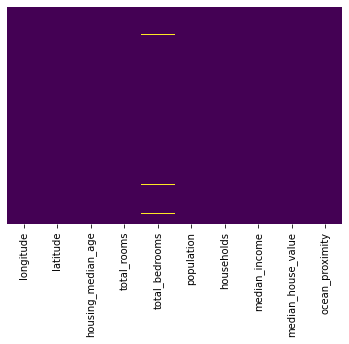

In [16]:
sns.heatmap(df.isna(), yticklabels = False,cbar=False,cmap='viridis')

In [17]:
df=df.fillna(df.median())

In [18]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

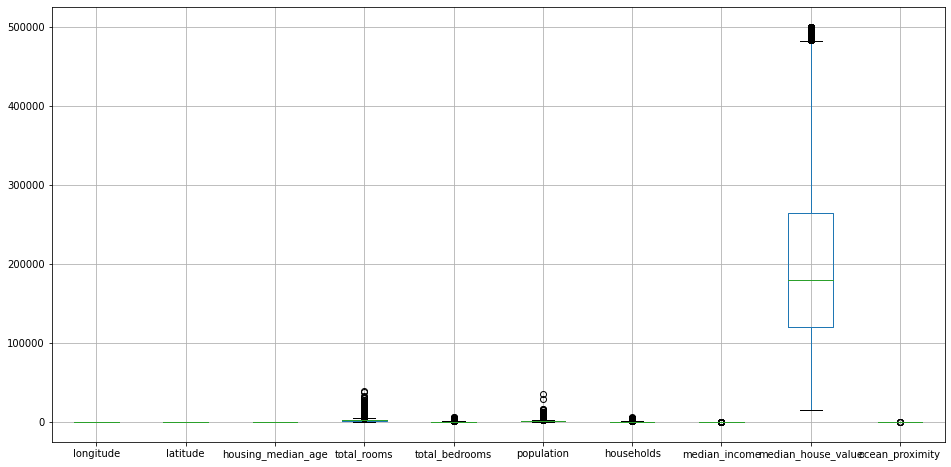

In [19]:
df.boxplot(figsize=(16,8))
plt.show()

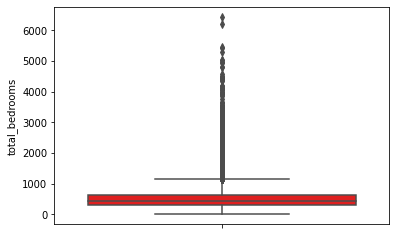

In [20]:
sns.boxplot(y="total_bedrooms",data=df,color="red");

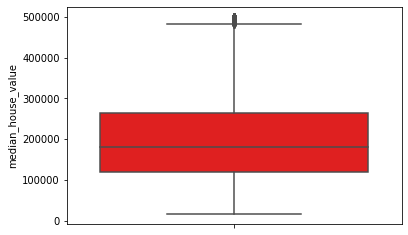

In [21]:
sns.boxplot(y="median_house_value",data=df,color="red");


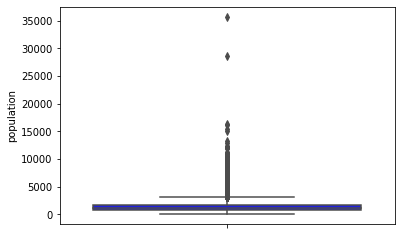

In [22]:
sns.boxplot(y="population",data=df,color="blue");


In [23]:
L=df['population'].quantile(0.95)
df_clean =df[df['population']<L]


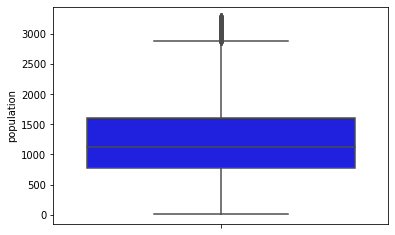

In [24]:
sns.boxplot(y="population",data=df_clean,color="blue");

<ipython-input-25-09f9e7de0709>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['housing_median_age'],color='y')


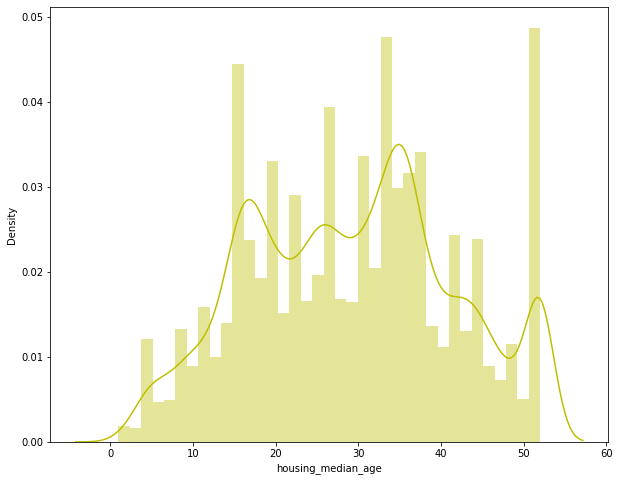

Housing median age-MIN 1.0
Housing median age-MAX 52.0


In [25]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['housing_median_age'],color='y')
plt.show()
print('Housing median age-MIN',df_clean['housing_median_age'].min())
print('Housing median age-MAX',df_clean['housing_median_age'].max())

<ipython-input-26-29cd96c710c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['population'],color='r')


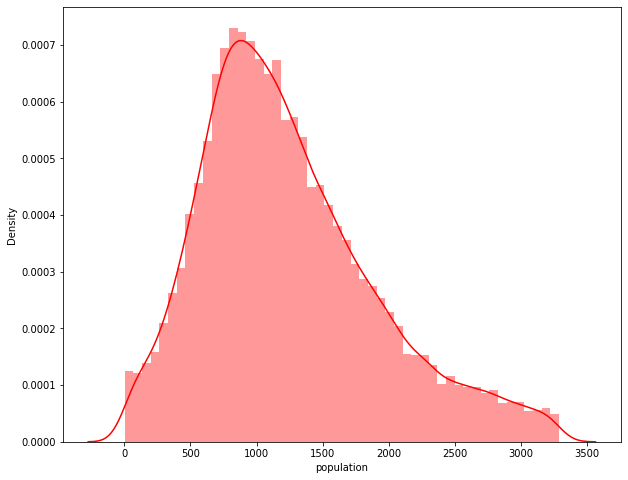

population-MIN 3.0
population-MAX 3287.0


In [26]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['population'],color='r')
plt.show()
print('population-MIN',df_clean['population'].min())
print('population-MAX',df_clean['population'].max())

<ipython-input-27-85f1d446a5cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['median_income'],color='g')


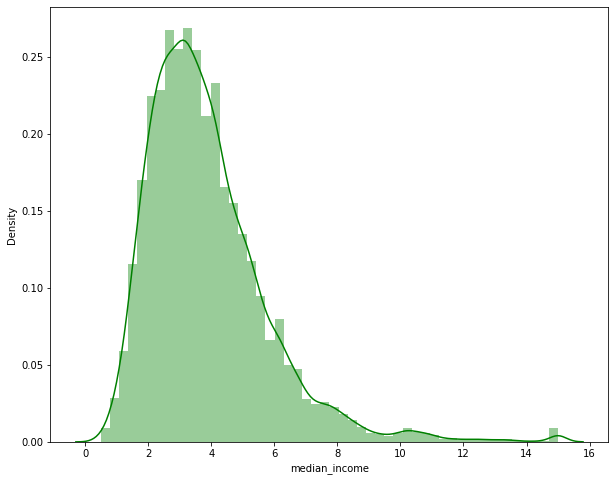

median income 0.4999
median income 15.0001


In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['median_income'],color='g')
plt.show()
print('median income',df_clean['median_income'].min())
print('median income',df_clean['median_income'].max())

<ipython-input-28-3a76b38b9c4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['total_rooms'],color='b')


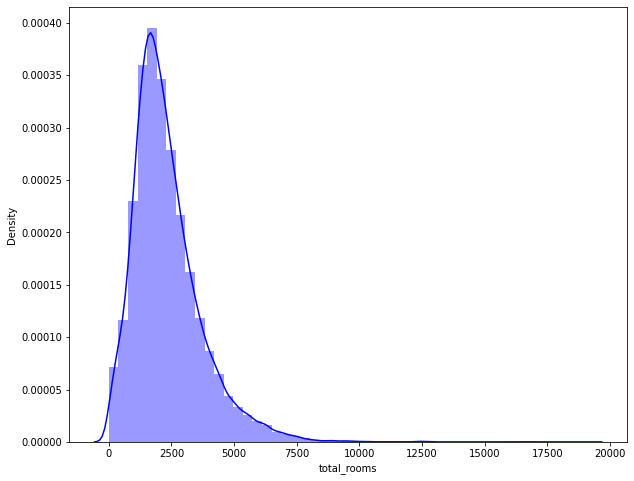

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['total_rooms'],color='b')
plt.show()

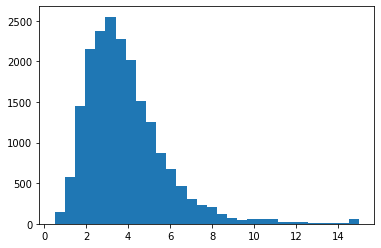

In [29]:
plt.hist(df_clean['median_income'],bins=30)
plt.show()

<ipython-input-30-cee408683308>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['households'],color='m')


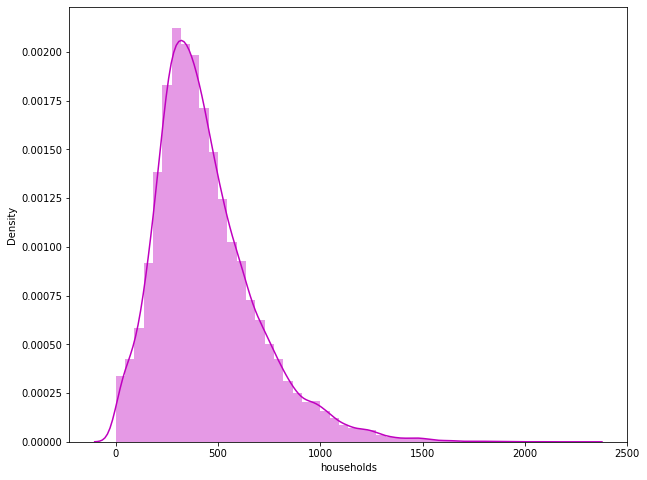

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['households'],color='m')
plt.show()

In [31]:
corr_matrix = df_clean.corr()

In [32]:
corr_df = corr_matrix['median_house_value'].sort_values(ascending=False)
corr_df

median_house_value    1.000000
median_income         0.688467
total_rooms           0.193088
housing_median_age    0.109925
households            0.096438
total_bedrooms        0.071093
population           -0.034604
longitude            -0.041835
latitude             -0.149001
ocean_proximity      -0.211294
Name: median_house_value, dtype: float64

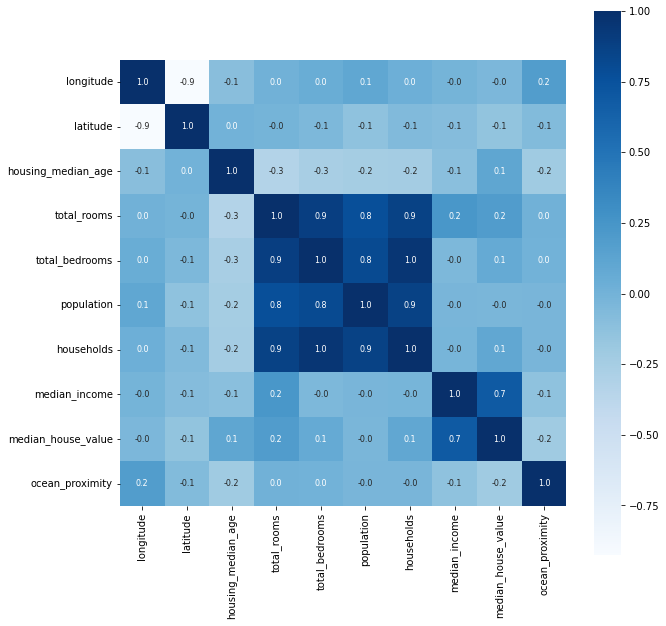

In [33]:
corr = df_clean.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr ,cbar='True',square = 'True',annot = True ,annot_kws={'size':8},cmap='Blues',fmt='.1F')
plt.show()

In [34]:
df_clean = df_clean.drop(['total_rooms','total_bedrooms','households'],axis=1)

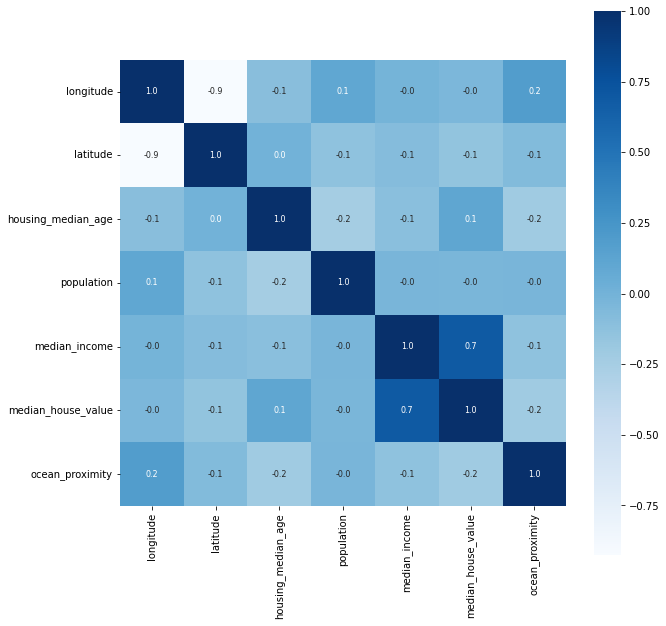

In [35]:
corr = df_clean.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr ,cbar='True',square = 'True',annot = True ,annot_kws={'size':8},cmap='Blues',fmt='.1F')
plt.show()

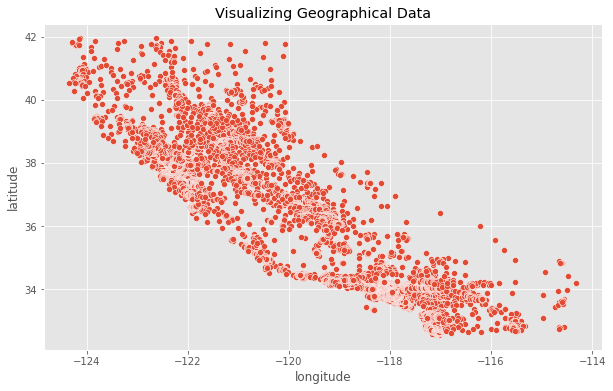

In [36]:
style.use('ggplot')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="longitude", y="latitude")
plt.title("Visualizing Geographical Data")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

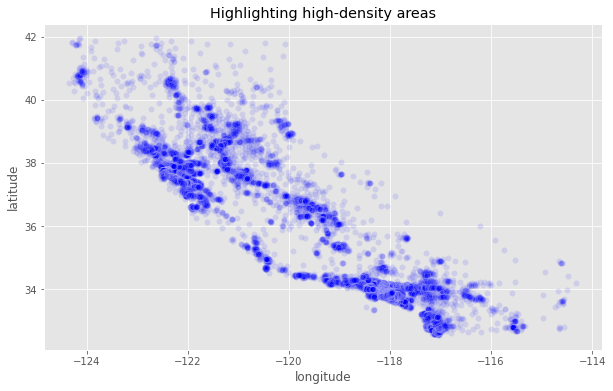

In [37]:
style.use('ggplot')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="longitude", y="latitude" , color='blue',alpha=.1)
plt.title("Highlighting high-density areas")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

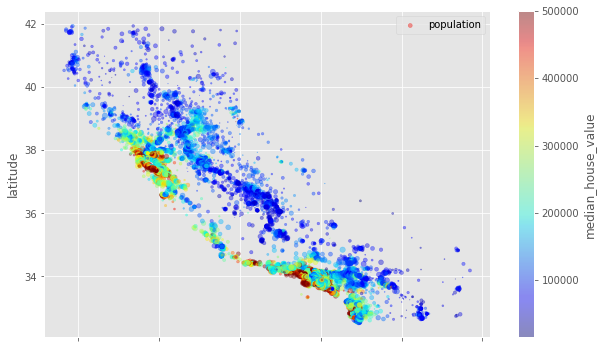

In [38]:
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df_clean["population"]/100, label="population", figsize=(10,6),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [39]:
train = df_clean.sample(frac=0.8,random_state=123)
test = df_clean.drop(train.index)

In [40]:
# split the data into train and test sets
X_train = train.drop(['median_house_value'],axis=1)
y_train = train['median_house_value']
X_test = test.drop(['median_house_value'],axis=1)
y_test = test['median_house_value']

In [41]:
X_train

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity
5237,-118.24,33.94,30.0,1071.0,1.2679,1
6319,-117.97,34.00,28.0,1407.0,3.8319,1
11637,-118.03,33.83,25.0,529.0,3.1750,1
7535,-118.23,33.92,24.0,1665.0,1.6437,1
19626,-121.03,37.33,27.0,730.0,3.0600,2
...,...,...,...,...,...,...
6931,-118.08,34.01,33.0,890.0,2.7679,1
11878,-117.38,33.99,52.0,905.0,2.7054,2
15584,-116.60,33.06,23.0,612.0,2.7813,2
5260,-118.50,34.05,39.0,414.0,15.0000,1


In [42]:
X_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
population            float64
median_income         float64
ocean_proximity         int64
dtype: object

In [43]:
X_test

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity
1,-122.22,37.86,21.0,2401.0,8.3014,0
5,-122.25,37.85,52.0,413.0,4.0368,0
13,-122.26,37.84,52.0,345.0,2.6736,0
16,-122.27,37.85,52.0,793.0,2.7750,0
17,-122.27,37.85,52.0,648.0,2.1202,0
...,...,...,...,...,...,...
20632,-121.45,39.26,15.0,1047.0,3.1250,2
20634,-121.56,39.27,28.0,1041.0,3.7125,2
20637,-121.22,39.43,17.0,1007.0,1.7000,2
20638,-121.32,39.43,18.0,741.0,1.8672,2


In [44]:
X_test.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
population            float64
median_income         float64
ocean_proximity         int64
dtype: object

In [45]:
import numpy as np

def calc_std_reduction(y, y_left, y_right):
    std_parent = np.std(y)
    std_left = np.std(y_left)
    std_right = np.std(y_right)
    n_total = len(y)
    n_left = len(y_left)
    n_right = len(y_right)
    std_reduction = std_parent - ((n_left/n_total)*std_left + (n_right/n_total)*std_right)
    return std_reduction

def best_split(X, y, min_samples_split):
    best_feature_idx, best_feature_val, best_std_reduction = None, None, 0
    n_features = X.shape[1]
    for feature_idx in range(n_features):
        feature_vals = np.unique(X[:, feature_idx])
        for feature_val in feature_vals:
            y_left = y[X[:, feature_idx] <= feature_val]
            y_right = y[X[:, feature_idx] > feature_val]
            if len(y_left) >= min_samples_split and len(y_right) >= min_samples_split:
                std_reduction = calc_std_reduction(y, y_left, y_right)
                if std_reduction > best_std_reduction:
                    best_feature_idx = feature_idx
                    best_feature_val = feature_val
                    best_std_reduction = std_reduction

    return best_feature_idx, best_feature_val

def build_tree(X, y, max_depth, min_samples_split, depth=0):
    n_samples, n_features = X.shape

    if depth == max_depth or n_samples < min_samples_split or len(np.unique(y)) == 1:
        leaf_value = np.mean(y)
        return leaf_value

    split_idx, split_val = best_split(X, y, min_samples_split)

    if split_idx is None:
        leaf_value = np.mean(y)
        return leaf_value

    left_idx = X[:, split_idx] <= split_val
    right_idx = X[:, split_idx] > split_val

    if sum(left_idx) == 0 or sum(right_idx) == 0:
        leaf_value = np.mean(y)
        return leaf_value

    tree = {}
    tree['split_idx'] = split_idx
    tree['split_val'] = split_val
    tree['left'] = build_tree(X[left_idx], y[left_idx], max_depth, min_samples_split, depth+1)
    tree['right'] = build_tree(X[right_idx], y[right_idx], max_depth, min_samples_split, depth+1)

    return tree

def fit(X, y, max_depth=None, min_samples_split=2):
    tree = build_tree(X, y, max_depth, min_samples_split, depth=0)
    return tree

def predict(X, tree):
    n_samples = X.shape[0]
    y_pred = np.zeros(n_samples)
    for i in range(n_samples):
        y_pred[i] = predict_tree(X[i], tree)
    return y_pred

def predict_tree(x, tree):
    if isinstance(tree, np.float64):
        return tree
    feature_val = x[tree['split_idx']]
    if feature_val <= tree['split_val']:
        return predict_tree(x, tree['left'])
    else:
        return predict_tree(x, tree['right'])



In [46]:
def grid_search(X_train, y_train, X_test, y_test, max_depth_options, min_samples_split_options):
    best_score = float('-inf')
    best_params = {}
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            model = fit(X_train, y_train, max_depth=max_depth, min_samples_split=min_samples_split)
            y_pred = predict(X_test, model)
            score = r2_score(y_test, y_pred) # or any other evaluation metric
            if score > best_score:
                best_score = score
                best_params['max_depth'] = max_depth
                best_params['min_samples_split'] = min_samples_split
    return best_params


In [47]:
def r2_score(y_true, y_pred):
    # Calculate the total sum of squares
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    
    # Calculate the residual sum of squares
    ss_res = np.sum((y_true - y_pred)**2)
    
    # Calculate the R-squared score
    r2 = 1 - (ss_res / ss_total)
    return r2

In [48]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

In [49]:
grid_search(X_train.values, y_train.values, X_test.values, y_test.values, param_grid['max_depth'], param_grid['min_samples_split'])


{'max_depth': 10, 'min_samples_split': 10}

In [51]:
tree = build_tree(X_train.values, y_train.values, max_depth=10, min_samples_split=10, depth=0)

In [52]:
y_pred = predict(X_test.values, tree)

In [53]:
y_pred

array([408781.71428571, 269750.        , 148227.19417476, ...,
        82111.26760563,  82111.26760563,  86249.38271605])

In [54]:
r2_score(y_test, y_pred)

0.7270334532819703